In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist=fetch_openml('mnist_784',version=1,as_frame=False)
x,y=mnist["data"],mnist['target'].astype(int)

In [3]:
mask=(y==3)|(y==5)
x_35=x[mask]
y_35=y[mask]
y_binary=(y_35==5).astype(int)

In [4]:
digit_3=[i.reshape(28,28) for i in x_35[y_35==3]]
digit_5=[i.reshape(28,28) for i in x_35[y_35==5]]

print("No. of images of 3",len(digit_3))
print("No. of images of 3",len(digit_5))

No. of images of 3 7141
No. of images of 3 6313


(-0.5, 27.5, 27.5, -0.5)

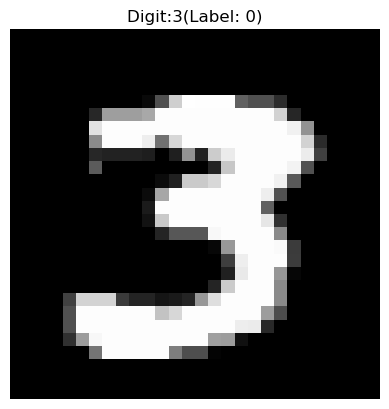

In [5]:
import matplotlib.pyplot as plt
plt.imshow(digit_3[3], cmap='gray')
plt.title("Digit:3(Label: 0)")
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

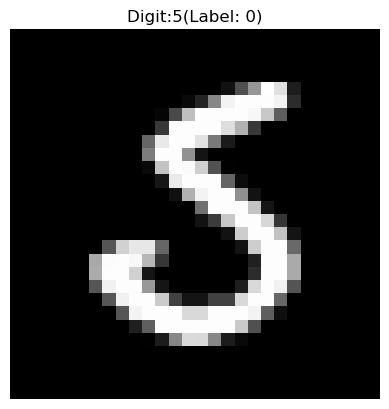

In [6]:
plt.imshow(digit_5[7], cmap='gray')
plt.title("Digit:5(Label: 0)")
plt.axis("off")

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_35,y_binary,test_size=0.2,random_state=42)


In [8]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

e:\Digital_University\Applications\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:/n               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1453
           1       0.95      0.95      0.95      1238

    accuracy                           0.95      2691
   macro avg       0.95      0.95      0.95      2691
weighted avg       0.95      0.95      0.95      2691



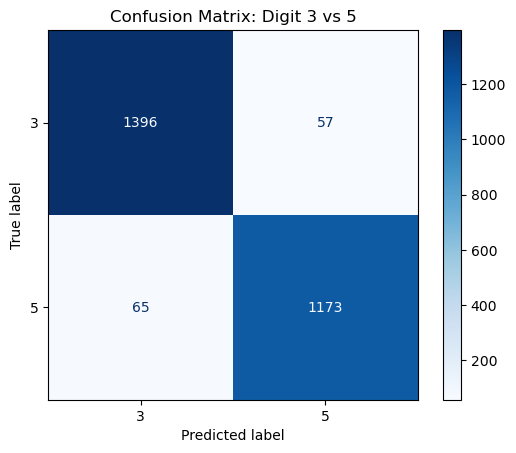

In [9]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
print("Classification Report:/n",classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
dis=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[3,5])
dis.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Digit 3 vs 5")
plt.show()